In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [180]:
df=pd.read_csv("/content/myntra_products_catalog.csv")
df

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White
...,...,...,...,...,...,...,...,...
12486,10262843,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,Pepe Jeans,Men,1299,7,"Black dark wash 5-pocket low-rise jeans, clean...",Black
12487,10261721,Mochi Women Gold-Toned Solid Heels,Mochi,Women,1990,5,"A pair of gold-toned open toe heels, has regul...",Gold
12488,10261607,612 league Girls Navy Blue & White Printed Reg...,612 league,Girls,602,4,Navy Blue and White printed mid-rise denim sho...,Blue
12489,10266621,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Bvlgari,Men,8950,2,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,NaN


In [181]:
df.shape

(12491, 8)

In [182]:
df.columns

Index(['ProductID', 'ProductName', 'ProductBrand', 'Gender', 'Price (INR)',
       'NumImages', 'Description', 'PrimaryColor'],
      dtype='object')

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
 3   Gender        12491 non-null  object
 4   Price (INR)   12491 non-null  int64 
 5   NumImages     12491 non-null  int64 
 6   Description   12491 non-null  object
 7   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(5)
memory usage: 780.8+ KB


In [184]:
df.isnull()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
12486,False,False,False,False,False,False,False,False
12487,False,False,False,False,False,False,False,False
12488,False,False,False,False,False,False,False,False
12489,False,False,False,False,False,False,False,True


In [185]:
df.isnull().sum()

ProductID         0
ProductName       0
ProductBrand      0
Gender            0
Price (INR)       0
NumImages         0
Description       0
PrimaryColor    894
dtype: int64

In [186]:
g=df.copy()
b=g.isnull().sum()
b

ProductID         0
ProductName       0
ProductBrand      0
Gender            0
Price (INR)       0
NumImages         0
Description       0
PrimaryColor    894
dtype: int64

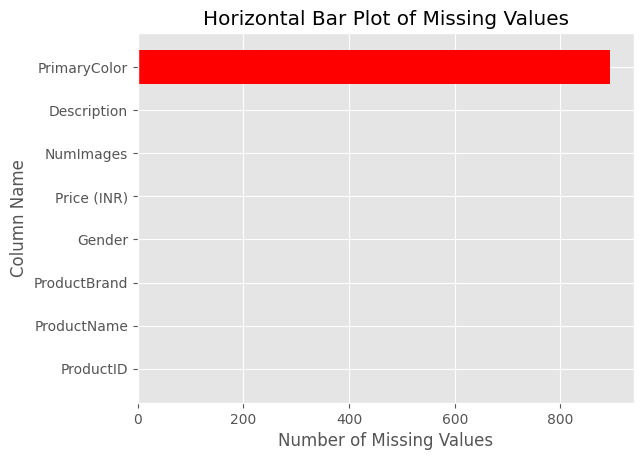

In [187]:
#horizontal bar plot for null values

# Create a horizontal bar chart with null values on the x-axis
plt.barh(b.index, b.values, color='red')
plt.xlabel("Number of Missing Values")
plt.ylabel("Column Name")
plt.title("Horizontal Bar Plot of Missing Values")
plt.show()

In [188]:
#filling the null value

df['PrimaryColor'].fillna('NA', inplace=True)

In [189]:
df.isnull().sum()

ProductID       0
ProductName     0
ProductBrand    0
Gender          0
Price (INR)     0
NumImages       0
Description     0
PrimaryColor    0
dtype: int64

In [190]:
df.columns

Index(['ProductID', 'ProductName', 'ProductBrand', 'Gender', 'Price (INR)',
       'NumImages', 'Description', 'PrimaryColor'],
      dtype='object')

In [191]:
df['ProductName'].value_counts()

Parx Men Blue Slim Fit Checked Casual Shirt                                          16
ZHEIA Women Blue Skinny Fit Mid-Rise Clean Look Stretchable Jeans                    15
Roadster Men Blue Skinny Fit Mid-Rise Clean Look Stretchable Jeans                   14
Sonari Pack of 2 Full-Coverage Bras                                                  14
Roadster Men Blue Slim Fit Mid-Rise Clean Look Stretchable Jeans                     13
                                                                                     ..
HRX by Hrithik Roshan Ultralyte Men Navy Blue Solid Running T-shirt                   1
Flying Machine Men Blue Michael Tapered Fit Mid-Rise Clean Look Stretchable Jeans     1
FAUSTO Men Red Slip-On Sneakers                                                       1
Indian Terrain Boys Rust Brown Printed Round Neck T-shirt                             1
Pepe Jeans Men Black & Grey Striped Polo Collar T-shirt                               1
Name: ProductName, Length: 10761

In [192]:
df['ProductBrand'].value_counts()

Indian Terrain                  971
Puma                            345
Pepe Jeans                      340
AURELIA                         307
Flying Machine                  301
                               ... 
Johnny Bravo by Kook N Keech      1
Allen Solly Sport                 1
HAMMER                            1
CUTECUMBER                        1
Stupid Cupid                      1
Name: ProductBrand, Length: 677, dtype: int64

In [193]:
df['Gender'].value_counts()

Women          5126
Men            4591
Unisex         1188
Boys           1100
Girls           440
Unisex Kids      46
Name: Gender, dtype: int64

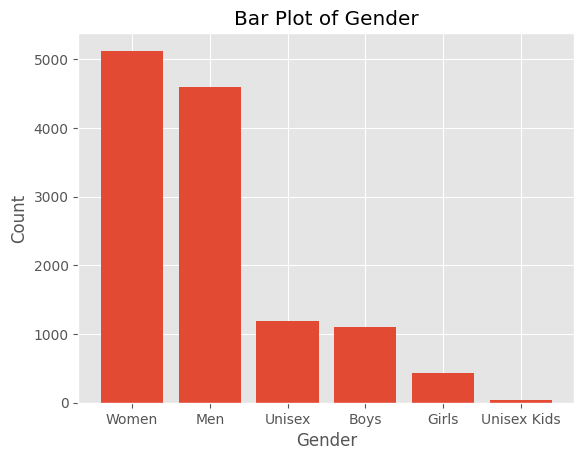

In [194]:
# Bar Plot for Gender

gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Bar Plot of Gender")
plt.show()

In [195]:
df.groupby(['NumImages', 'ProductName']).size().reset_index(name='count').sort_values(by=['NumImages', 'ProductName'], ascending=False)



,NumImages,ProductName,count
10947,10,W Women Pink Printed Top with Dhoti Pants & Et...,1
10946,10,W Women Green & Pink Embroidered Top with Skir...,1
10945,10,EthnoVogue Beige & Yellow Printed Made to Meas...,1
10944,9,W Women Navy Blue & Golden Embellished Top wit...,1
10943,9,W Women Maroon & Golden Embroidered Kurta with...,1
...,...,...,...
4,1,Organic Harvest Unisex Sulphate Free Skin Ligh...,1
3,1,Elizabeth Arden New York Plump Up Kiss Me Cora...,1
2,1,Blissta Beige & Red Cotton Unstitched Dress Ma...,1
1,1,BEARDO Men De-Tan Peel-Off Mask 100 g,1


In [196]:
df.groupby(['NumImages', 'ProductName']).size().sort_values(ascending=False)



NumImages  ProductName                                                       
5          Parx Men Blue Slim Fit Checked Casual Shirt                           16
           ZHEIA Women Blue Skinny Fit Mid-Rise Clean Look Stretchable Jeans     15
7          Roadster Men Blue Skinny Fit Mid-Rise Clean Look Stretchable Jeans    14
           Roadster Men Blue Slim Fit Mid-Rise Clean Look Stretchable Jeans      13
5          Next Look Men Blue Slim Fit Self Design Formal Shirt                  12
                                                                                 ..
           DODO & MOA Women Black Sheath Dress                                    1
           DODO & MOA Women Maroon Fit and Flare Dress                            1
           DODO & MOA Women Red & White Checked Sheath Dress                      1
           DODO & MOA Women Red Embroidered Top                                   1
10         W Women Pink Printed Top with Dhoti Pants & Ethnic Jacket              

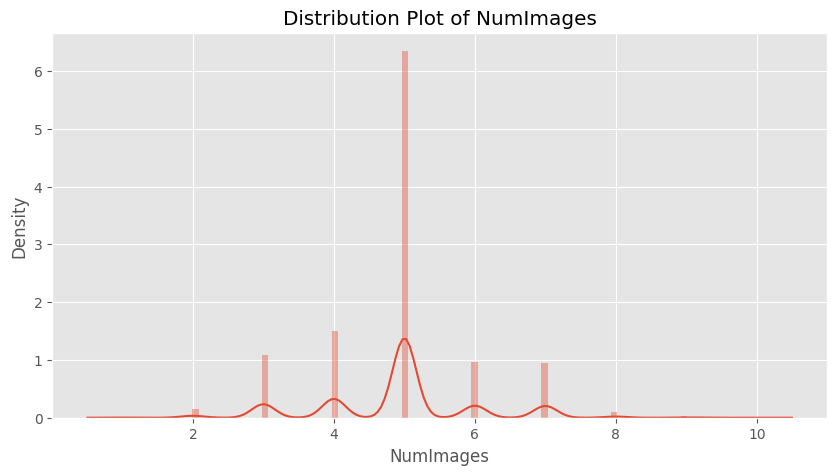

In [197]:

plt.figure(figsize=(10, 5))
sns.distplot(df['NumImages'], bins=100)
plt.title('Distribution Plot of NumImages')
plt.xlabel('NumImages')
plt.ylabel('Density')
plt.show()

In [198]:
df['PrimaryColor'].value_counts()

Blue         3443
 Black       1640
 Red         1543
 Green        908
NA            894
 White        880
 Grey         684
 Brown        473
 Yellow       406
 Pink         391
 Gold         236
 Beige        236
 Maroon       187
 Orange       130
 Silver       111
 Purple        65
 Burgundy      64
 Khaki         56
 Navy          54
 Lavender      19
 Matte         17
 Mustard       15
 Magenta       13
 Charcoal      10
 Rose           8
 Platinum       3
 Bronze         3
 Peach          2
Name: PrimaryColor, dtype: int64

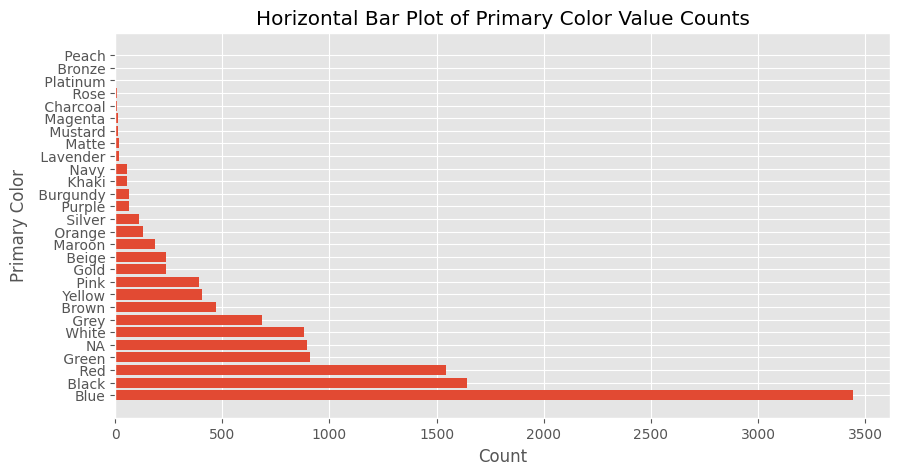

In [199]:
#  bar h plot for primarycolor value.count

color_counts = df['PrimaryColor'].value_counts()

plt.figure(figsize=(10, 5))
plt.barh(color_counts.index, color_counts.values)
plt.xlabel("Count")
plt.ylabel("Primary Color")
plt.title("Horizontal Bar Plot of Primary Color Value Counts")
plt.show()


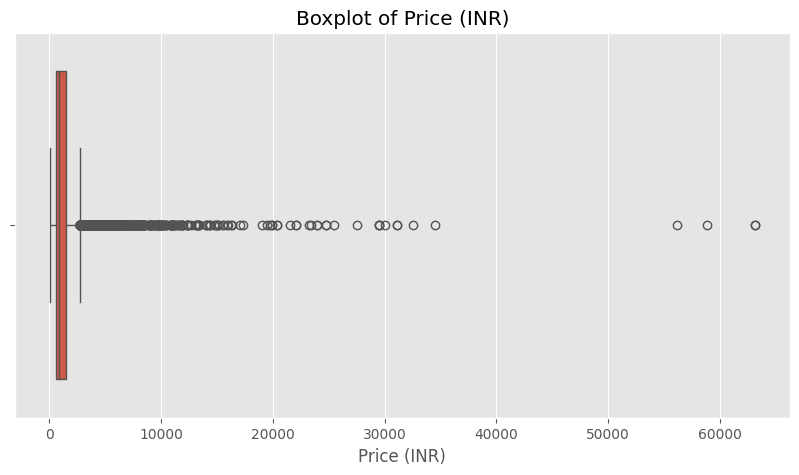

In [200]:
#boxplot

# Boxplot for Price (INR)

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Price (INR)'])
plt.xlabel('Price (INR)')
plt.title('Boxplot of Price (INR)')
plt.show()

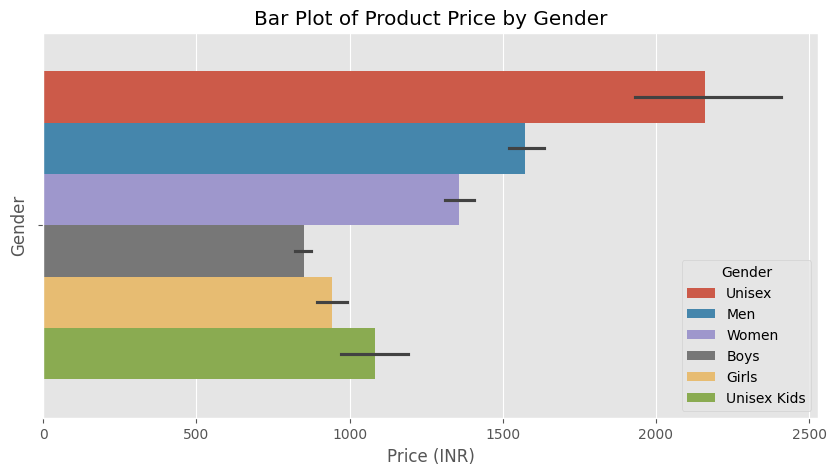

In [201]:
# barplot of price by gender with colours

import seaborn as sns

# Sort DataFrame by 'Price (INR)' in descending order
df_sorted = df.sort_values(by='Price (INR)', ascending=True)

# Create a bar plot of Price by Gender, with color based on Gender
plt.figure(figsize=(10, 5))
sns.barplot(x='Price (INR)', hue='Gender', data=df_sorted,)
plt.title('Bar Plot of Product Price by Gender')
plt.xlabel('Price (INR)')
plt.ylabel('Gender')
plt.show()


In [202]:
#groupby

df.groupby('Gender')['Price (INR)'].mean()

Gender
Boys            849.890909
Girls           941.459091
Men            1573.978872
Unisex         2161.124579
Unisex Kids    1082.717391
Women          1356.361295
Name: Price (INR), dtype: float64

In [203]:
df.columns

Index(['ProductID', 'ProductName', 'ProductBrand', 'Gender', 'Price (INR)',
       'NumImages', 'Description', 'PrimaryColor'],
      dtype='object')

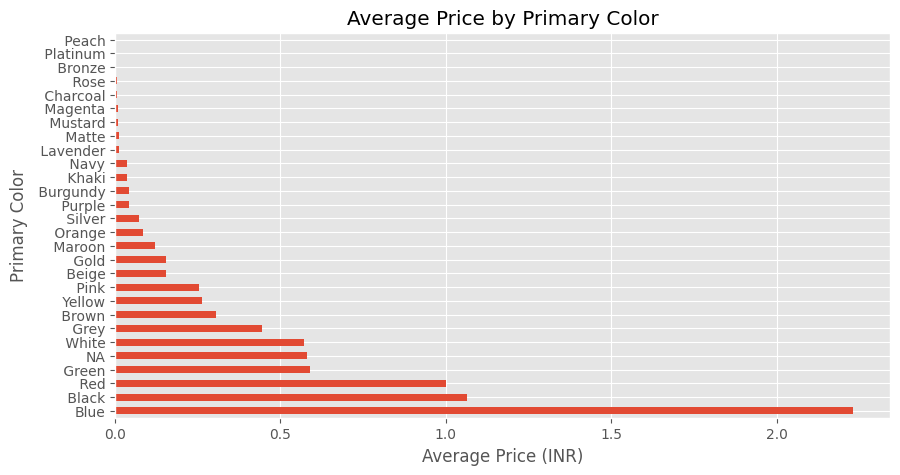

In [204]:
# bar h plot to primarycolor of price

# Create a crosstab of PrimaryColor and Price (INR)
price_by_color = pd.crosstab(df['PrimaryColor'], df['Price (INR)'])

# Get the average price for each color
avg_price_by_color = price_by_color.mean(axis=1)

# Sort the average price in descending order
avg_price_by_color = avg_price_by_color.sort_values(ascending=False)

# Create a horizontal bar plot of the average price by color
plt.figure(figsize=(10, 5))
avg_price_by_color.plot(kind='barh')
plt.xlabel('Average Price (INR)')
plt.ylabel('Primary Color')
plt.title('Average Price by Primary Color')
plt.show()


In [205]:
# prompt: top 10 product names with reference with to price decending order  with thir prices

top_10_products = df.sort_values(by='Price (INR)', ascending=False).head(10)[['ProductName', 'Price (INR)']]
print(top_10_products)


                                            ProductName  Price (INR)
7416  Garmin Unisex Blue Forerunner 945 Smartwatch 0...        63090
7465  Garmin Unisex Black Forerunner 945 Smartwatch ...        63090
1568             MOVADO Men Black Analogue Watch 607243        58854
1376            MOVADO Women Blue Analogue Watch 607268        56192
9400   SEIKO Solar Women Silver Analogue watch SUP428P1        34500
1472   MOVADO Men Blue Swiss-Made Analogue Watch 607197        32532
470                DKNY Unisex Purple Large Trolley Bag        31100
960   DKNY Unisex Black & Grey Printed Large Trolley...        31100
6102  PRESTO Beige & Black Printed Handmade Anti-Ski...        29998
8953      SEIKO Solar Men Black Analogue watch SSC723P1        29500


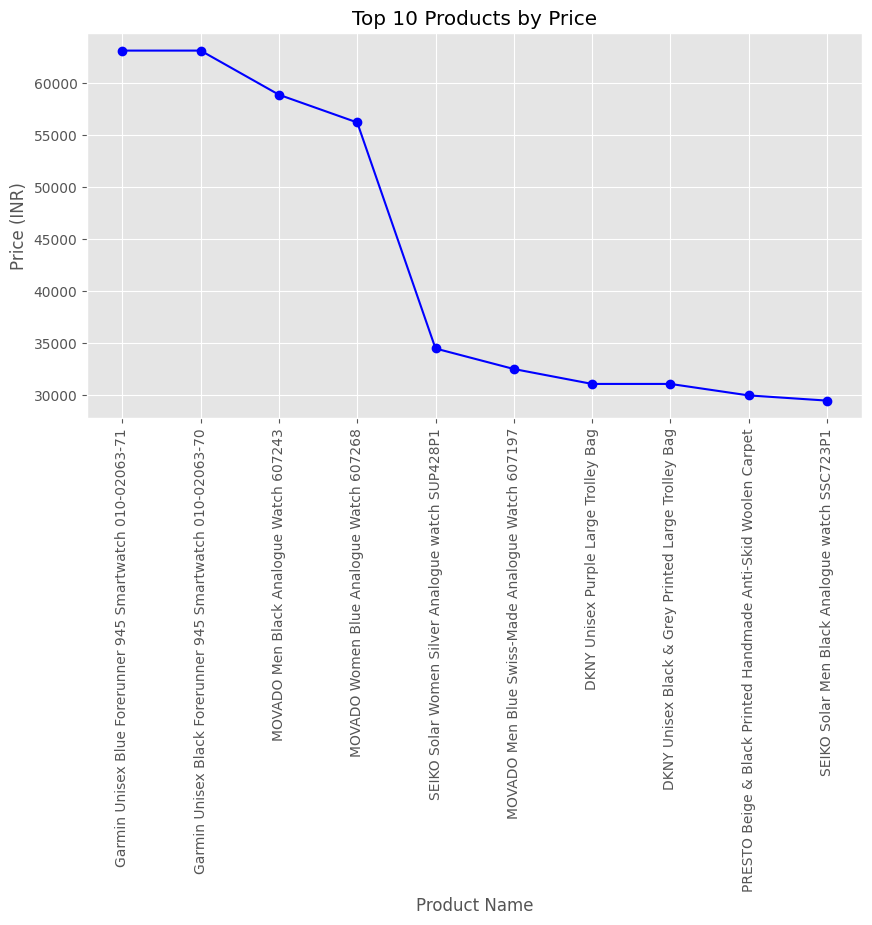

In [206]:
#line plot for  top 10 product names with reference with to price   with their prices

# Extract the top 10 product names and prices
product_names = top_10_products['ProductName'].tolist()
product_prices = top_10_products['Price (INR)'].tolist()

# Create the line plot
plt.figure(figsize=(10, 5))
plt.plot(product_names, product_prices, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Product Name')
plt.ylabel('Price (INR)')
plt.title('Top 10 Products by Price')

# Set the x-axis tick labels to be vertical
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [207]:
# print top 10 higest prices of brands with prices

# Get the top 10 highest prices
top_10_prices = df.sort_values(by='Price (INR)', ascending=False).head(10)

# Extract the product names and prices
product_prices = top_10_prices['Price (INR)'].tolist()

# Extract the brands
brands = []
for product_name in product_names:
  brand = product_name.split(' ')[0]
  brands.append(brand)

# Create a DataFrame with the top 10 highest prices and brands
top_10_prices_df = pd.DataFrame({
  'Price (INR)': product_prices,
  'Brand': brands
})

# Print the DataFrame
print(top_10_prices_df)


   Price (INR)   Brand
0        63090  Garmin
1        63090  Garmin
2        58854  MOVADO
3        56192  MOVADO
4        34500   SEIKO
5        32532  MOVADO
6        31100    DKNY
7        31100    DKNY
8        29998  PRESTO
9        29500   SEIKO


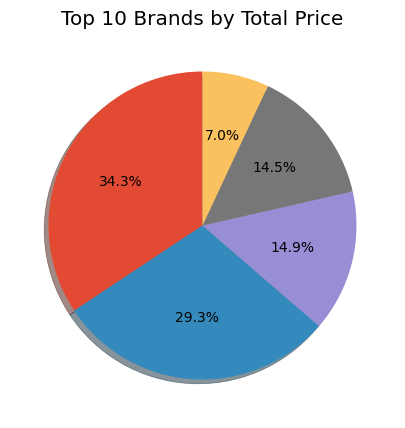

In [208]:
# pieplot for price brand top 10 as above

# Get the top 10 highest prices
top_10_prices = df.sort_values(by='Price (INR)', ascending=False).head(10)

# Extract the product names and prices
product_prices = top_10_prices['Price (INR)'].tolist()

# Extract the brands
brands = []
for product_name in product_names:
  brand = product_name.split(' ')[0]
  brands.append(brand)

# Create a DataFrame with the top 10 highest prices and brands
top_10_prices_df = pd.DataFrame({
  'Price (INR)': product_prices,
  'Brand': brands
})

# Group the DataFrame by brand and sum the prices
grouped_df = top_10_prices_df.groupby('Brand')['Price (INR)'].sum()

# Get the top 10 brands by total price
top_10_brands = grouped_df.sort_values(ascending=False).head(10)

# Create a pie plot of the top 10 brands by total price
plt.figure(figsize=(10, 5))
plt.pie(top_10_brands, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Top 10 Brands by Total Price')
plt.show()


In [209]:
df.columns

Index(['ProductID', 'ProductName', 'ProductBrand', 'Gender', 'Price (INR)',
       'NumImages', 'Description', 'PrimaryColor'],
      dtype='object')

# Implement a recommendation system based on gender, prices to suggest items to users.

In [210]:
# prompt: generate pivot table

pivot_table1=df.pivot_table(values='Price (INR)', index='Gender', columns='ProductName',fill_value=0)
pivot_table1



ProductName,109F Women Blue Dyed Straight Maxi Skirt,20Dresses Women Maroon Solid A-Line Dress,20Dresses Women White Pure Cotton Self-Striped Peplum Top,20Dresses Women White Self-Striped A-Line Dress,22 KT Gold-Plated & Silver-Toned Textured Cuff Bracelet,612 League Boys Grey Solid Joggers,612 league Boys Blue Regular Fit High-Rise Clean Look Jeans,612 league Boys Blue Regular Fit Mid-Rise Clean Look Jeans,612 league Boys Blue Solid Polo Collar T-shirt,612 league Boys Blue Solid Track Pants,...,t-base Boys Black Camouflage Printed Lightweight Puffer Jacket,t-base Boys Blue Solid Lightweight Puffer Jacket,t-base Boys Navy Blue & Grey Printed Lightweight Jacket,t-base Boys Red & Navy Blue Colourblocked Lightweight Jacket,t-base Boys Yellow Colourblocked Lightweight Jacket,t-base Girls Red Printed Lightweight Jacket,t-base Girls Red Printed Lightweight Puffer Jacket,trueBrowns Women Beige Solid Straight Kurta,trueBrowns Women Beige Woven Design A-Line Kurta,yelloe Black Solid Sling Bag
Gender,,,,,,,,,,,,,,,,,,,,,
Boys,0,0,0,0,0,629,877,822,382,574,...,1249,999,1149,1099,1099,0,0,0,0,0
Girls,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1049,1299,0,0,0
Men,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Unisex,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Unisex Kids,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Women,1299,1017,1046,1396,464,0,0,0,0,0,...,0,0,0,0,0,0,0,1609,1839,774


In [211]:
pivot_table1.shape

(6, 10761)

In [212]:
X=pivot_table1.T
X

Gender,Boys,Girls,Men,Unisex,Unisex Kids,Women
ProductName,,,,,,
109F Women Blue Dyed Straight Maxi Skirt,0.0,0.0,0.0,0.0,0.0,1299.0
20Dresses Women Maroon Solid A-Line Dress,0.0,0.0,0.0,0.0,0.0,1017.0
20Dresses Women White Pure Cotton Self-Striped Peplum Top,0.0,0.0,0.0,0.0,0.0,1046.0
20Dresses Women White Self-Striped A-Line Dress,0.0,0.0,0.0,0.0,0.0,1396.0
22 KT Gold-Plated & Silver-Toned Textured Cuff Bracelet,0.0,0.0,0.0,0.0,0.0,464.0
...,...,...,...,...,...,...
t-base Girls Red Printed Lightweight Jacket,0.0,1049.0,0.0,0.0,0.0,0.0
t-base Girls Red Printed Lightweight Puffer Jacket,0.0,1299.0,0.0,0.0,0.0,0.0
trueBrowns Women Beige Solid Straight Kurta,0.0,0.0,0.0,0.0,0.0,1609.0


# Singular Value Decomposition (SVD)

* Decomposing a matrix means breaking it down into simpler, more manageable components.
* Matrix decomposition techniques, such as Singular Value Decomposition (SVD) or Principal Component Analysis (PCA), can be used to reduce the dimensionality of a dataset. By representing data in terms of fewer dimensions, it becomes easier to visualize and analyze.





In [213]:
SVD = TruncatedSVD(n_components=6)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(10761, 6)

# Correlation Matrix

In [214]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(10761, 10761)

# Assuming the customer buys (612 league Boys Blue Regular Fit High-Rise Clean Look Jeans) (selected randomly)

In [215]:
X.index[6]

'612 league Boys Blue Regular Fit High-Rise Clean Look Jeans'

# Index of product purchased by customer

In [216]:
i = "612 league Boys Blue Regular Fit High-Rise Clean Look Jeans"

product_names = list(X.index)
product_name = product_names.index(i)
product_name

6

# correlation of product purchased

In [217]:
correlation_product_name = correlation_matrix[product_name]
correlation_product_name.shape

(10761,)

# Recommending top 10 highly correlated products in sequence

In [218]:
Recommend = list(X.index[correlation_product_name > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i)

Recommend[0:9]


['612 League Boys Grey Solid Joggers',
 '612 league Boys Blue Regular Fit Mid-Rise Clean Look Jeans',
 '612 league Boys Blue Solid Polo Collar T-shirt',
 '612 league Boys Blue Solid Track Pants',
 '612 league Boys Grey & Blue Camouflage Printed Joggers',
 '612 league Boys Orange & Navy Blue Checked Casual Shirt With a T-shirt',
 '612 league Boys Orange Printed Round Neck T-shirt',
 '612 league Boys White & Red Regular Fit Printed Casual Shirt',
 'ADIDAS Boys Blue X 19.3 Firm Ground J Football Shoes']

# Implement a recommendation system based on gender, prices to suggest items to users(Using cosine function)

In [219]:
# Create a user-item matrix using pivot table
user_item_matrix = df.pivot_table(values='Price (INR)', index='ProductName', columns='Gender',fill_value=0)

# Calculate the cosine similarity between users
cosine_sim = sklearn.metrics.pairwise.cosine_similarity(user_item_matrix)

# Get the index of the item the user is interested in
item_index = user_item_matrix.index.get_loc('612 league Boys Blue Regular Fit High-Rise Clean Look Jeans')

# Get the similarity scores for the item
similarity_scores = cosine_sim[item_index]

# Get the top 10 most similar items
similar_items = user_item_matrix.index[similarity_scores.argsort()[-10:]]

# Print the similar items
print("Similar Items:")
print(similar_items)

Similar Items:
Index(['Indian Terrain Boys Brown Regular Fit Printed Trousers',
       'Indian Terrain Boys Brown Printed Round Neck T-shirt',
       'Indian Terrain Boys Brown Camo Printed Regular Fit Cargos',
       'Indian Terrain Boys Brown & Black Regular Fit Printed Chinos',
       'Indian Terrain Boys Blue Striped Round Neck T-shirt',
       'Indian Terrain Boys Blue Striped Henley Neck T-shirt',
       'Indian Terrain Boys Blue Striped Cotton Regular Fit Casual Shirt',
       'Indian Terrain Boys Blue Solid Polo Collar T-shirt',
       'Marvel by Wear Your Mind Boys Black Printed Round Neck T-shirt',
       'Flying Machine Boys Grey Melange & Red Printed Round Neck T-shirt'],
      dtype='object', name='ProductName')


# Classfying products based on Price range

In [220]:
# Identify price ranges and trends.
print("Minimum Price:", df['Price (INR)'].min())
print("Maximum Price:", df['Price (INR)'].max())
print("Average Price:", df['Price (INR)'].mean())
print("Median Price:", df['Price (INR)'].median())

# Calculate the quartiles to identify potential price ranges.
Q1 = df['Price (INR)'].quantile(0.25)
Q3 = df['Price (INR)'].quantile(0.75)
IQR = Q3 - Q1

# Print the potential price ranges.
print("Potential Price Ranges:")
print("Low-End:", df['Price (INR)'].min(), "-", Q1)
print("Mid-Range:", Q1, "-", Q3)
print("High-End:", Q3, "-", df['Price (INR)'].max())

Minimum Price: 90
Maximum Price: 63090
Average Price: 1452.6609558882396
Median Price: 920.0
Potential Price Ranges:
Low-End: 90 - 649.0
Mid-Range: 649.0 - 1499.0
High-End: 1499.0 - 63090


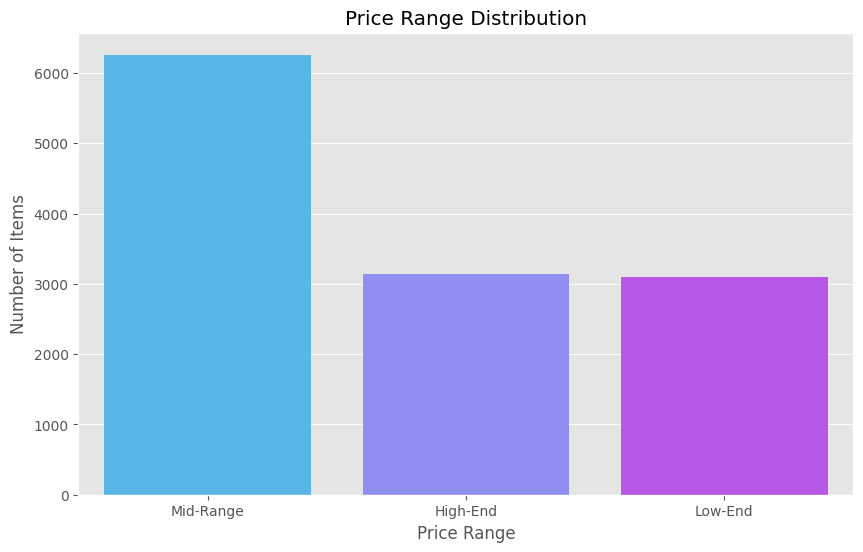

In [235]:
def get_price_range(price):
  if price < Q1:
    return "Low-End"
  elif price < Q3:
    return "Mid-Range"
  else:
    return "High-End"

# Create a new column in the DataFrame to store the price range
df['price_range'] = df['Price (INR)'].apply(get_price_range)

# Group the DataFrame by price range and count the number of items in each range
price_range_counts = df['price_range'].value_counts()

# Plot the price range counts
plt.figure(figsize=(10, 6))
plt.title('Price Range Distribution')
sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette= "cool")
plt.xlabel('Price Range')
plt.ylabel('Number of Items')
plt.show()

In [222]:
df.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor,price_range
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black,High-End
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige,High-End
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink,Mid-Range
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue,High-End
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White,Mid-Range


# Recommendation system based on gender, brand and price range (Filtering)

In [231]:
# recommend products based on gender and product brand

def recommend_by_gender_and_brand_price_range(df, gender, brand, price_range):
    # Filter the DataFrame based on gender and brand
    filtered_df = df[(df['Gender'] == gender) & (df['ProductBrand'] == brand) & (df['Price (INR)'] >= price_range[0]) & (df['Price (INR)'] <= price_range[1])]

    # Sort the filtered DataFrame by ratings in descending order
    sorted_df = filtered_df.sort_values('ProductBrand', ascending=False)

    # Return the top 10 recommended items
    return sorted_df.head(10)

# Example usage:
# Get user input for gender and brand
gender = input("Enter your gender (Male/Female/etc): ")
brand = input("Enter the brand you are interested in: ")
min_price = float(input("Enter the minimum price: "))
max_price = float(input("Enter the maximum price: "))
price_range = [min_price, max_price]

# Recommend items based on the user's input gender and brand
recommended_items = recommend_by_gender_and_brand_price_range(df, gender, brand, price_range)

# Print the recommended items
for index, item in recommended_items.iterrows():
    print("Name:", item['ProductName'], "Price:", item['Price (INR)'], "Brand:", item['ProductBrand'])
    print()


Enter your gender (Male/Female/etc): Women
Enter the brand you are interested in: plusS
Enter the minimum price: 300
Enter the maximum price: 700
Name: plusS Women Black & White Checked Straight Palazzos Price: 699 Brand: plusS

Name: plusS Women Blue Solid Accordion Pleat Bardot Top Price: 607 Brand: plusS

Name: plusS Women Rust Red & Black Polka Dot Print Wrap Top Price: 543 Brand: plusS

Name: plusS Women Mustard Yellow & Black Polka Dot Print Cinched Waist Top Price: 447 Brand: plusS

Name: plusS Women White & Black Checked Straight Palazzos Price: 699 Brand: plusS

Name: plusS Women Yellow & White Floral Print Layered A-Line Top Price: 575 Brand: plusS

Name: plusS Women Rust Red & Black Polka Dot Printed Cinched Waist Top Price: 447 Brand: plusS

Name: plusS Women Grey Floral Printed A-Line Top Price: 575 Brand: plusS

Name: plusS Women Blue Solid Shirt Style Top Price: 511 Brand: plusS

Name: plusS Women Mauve Solid Shirt Style Top Price: 511 Brand: plusS



# Find product using product name

In [224]:
product_name = input("Enter the name of the product you are interested in: ")


# Get the index of the product in the DataFrame
product_index = df[df['ProductName'] == product_name].index[0]

# Get the row of the product from the DataFrame
product_row = df.iloc[product_index]

# Print the product information
print("Product Name:", product_row['ProductName'])
print("Price:", product_row['Price (INR)'])
print("Brand:", product_row['ProductBrand'])

Enter the name of the product you are interested in: plusS Women Mustard Yellow & Black Polka Dot Print Cinched Waist Top
Product Name: plusS Women Mustard Yellow & Black Polka Dot Print Cinched Waist Top
Price: 447
Brand: plusS
